# Eksploracja danych

Wstępny przegląd danych z pierwszej paczki

In [356]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [357]:
calendar = pd.read_csv('../data/calendar.csv')
listings = pd.read_csv('../data/listings.csv')
reviews = pd.read_csv('../data/reviews.csv')

## Calendar

Wnioski

* Adjusted price - tylko brakujące wartości
* Dzień tygodnia nie wpływa na liczebność
* Więcej niedostępnych niż dostępnych (tego samego rzędu wielkości)
* Sporo wartości odstających w cenach
  * rozkład typu Gauss z rozciągniętym ogonem
* Minimum nights
  * najczęściej małe kilka albo 92 (szpilka)
  * wartości odstające (piekielnie dużo jak na minimum nocy, pomyłki przy wpisywaniu?)
* Maximum nights
  * wartości odstające (np. int max)
  * często 365 dni
* Nie ma wyraźnego trendu w cenach



In [358]:
calendar["price"] = calendar["price"].apply(lambda p: float(p.replace("$", "").replace(",", "")))

In [359]:
calendar.describe()

,listing_id,price,adjusted_price,minimum_nights,maximum_nights
count,1.530937e+06,1.530937e+06,0.0,1.530937e+06,1.530937e+06
mean,4.181534e+17,1.460950e+02,NaN,4.181798e+01,1.083568e+06
std,5.077212e+17,3.686472e+02,NaN,5.351443e+01,4.821147e+07
min,3.176000e+03,0.000000e+00,NaN,1.000000e+00,1.000000e+00
25%,1.981368e+07,5.300000e+01,NaN,2.000000e+00,1.800000e+02
50%,4.442589e+07,8.500000e+01,NaN,5.000000e+00,7.300000e+02
75%,9.511643e+17,1.400000e+02,NaN,9.200000e+01,1.125000e+03
max,1.315853e+18,1.000000e+04,NaN,1.125000e+03,2.147484e+09


In [360]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530937 entries, 0 to 1530936
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   listing_id      1530937 non-null  int64  
 1   date            1530937 non-null  object 
 2   available       1530937 non-null  object 
 3   price           1530937 non-null  float64
 4   adjusted_price  0 non-null        float64
 5   minimum_nights  1530937 non-null  int64  
 6   maximum_nights  1530937 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 81.8+ MB


In [361]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,25934882,2025-07-19,f,25.0,NaN,92,1125
1,18195157,2025-04-22,f,69.0,NaN,4,14
2,6936725,2025-08-23,f,45.0,NaN,92,1125
3,1144212829079606426,2025-07-17,f,45.0,NaN,2,15
4,984806212481376557,2025-01-02,f,40.0,NaN,92,180


In [362]:
calendar["listing_id"].value_counts().describe()

count    13984.000000
mean       109.477760
std          8.733588
min         73.000000
25%        104.000000
50%        109.000000
75%        115.000000
max        143.000000
Name: count, dtype: float64

In [363]:
len(calendar["listing_id"].unique())

13984

count        1530937
unique           365
top       2025-09-28
freq            4399
Name: date, dtype: object
Min 2024-12-21
Max 2025-12-20


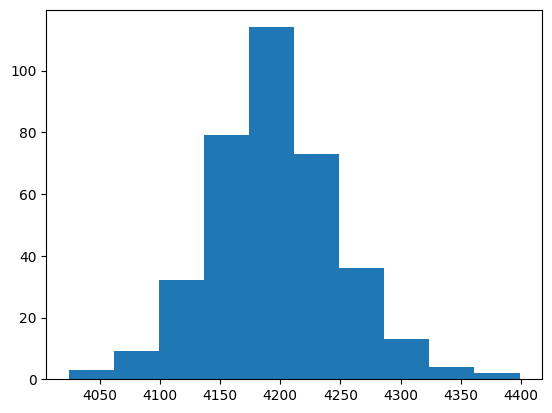

(array([1442., 1405.,    0., 1452.,    0., 1403., 1458.,    0., 1438.,
        1402.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

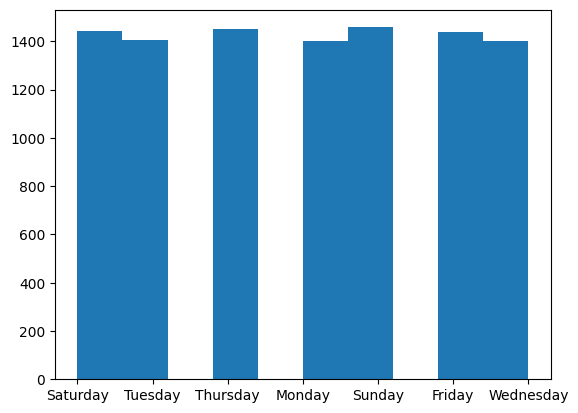

In [364]:
date = calendar["date"]

print(date.describe())
print("Min", date.min())
print("Max", date.max())

plt.hist(date.value_counts())
plt.show()

weekdays = calendar["date"].head(10_000).apply(lambda d: pd.to_datetime(d).day_name()) # head bc of long calculation
plt.hist(weekdays)

<BarContainer object of 2 artists>

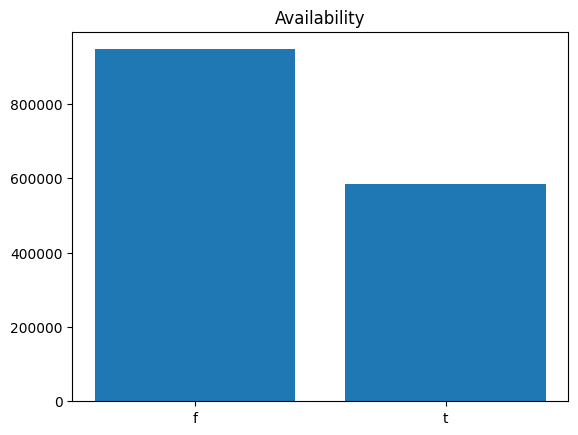

In [365]:
plt.title("Availability")
plt.bar(x=calendar["available"].value_counts().keys(), height=calendar["available"].value_counts().values)

In [366]:
price = calendar["price"]
price.describe()

count    1.530937e+06
mean     1.460950e+02
std      3.686472e+02
min      0.000000e+00
25%      5.300000e+01
50%      8.500000e+01
75%      1.400000e+02
max      1.000000e+04
Name: price, dtype: float64

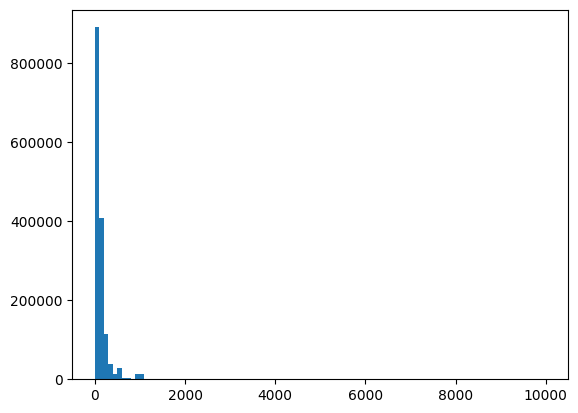

In [367]:
plt.hist(price, bins=100)
plt.show()

In [368]:
print(price[price > 500].count())
print(price.quantile(0.97))

54007
553.0


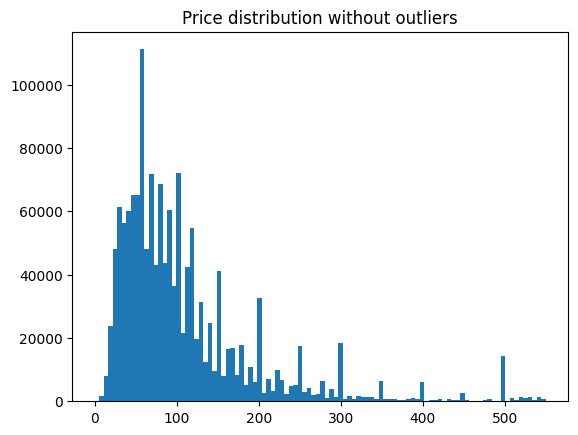

In [369]:
upper_bound = price.quantile(0.97)
price = price[price < upper_bound]
plt.hist(price, bins=100)
plt.title("Price distribution without outliers")
plt.show()

In [370]:
print(calendar["adjusted_price"].describe())
print(calendar["adjusted_price"].unique())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: adjusted_price, dtype: float64
[nan]


count    1.530937e+06
mean     4.181798e+01
std      5.351443e+01
min      1.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      9.200000e+01
max      1.125000e+03
Name: minimum_nights, dtype: float64


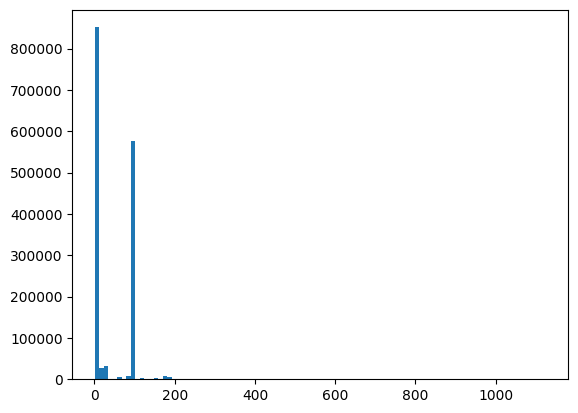

In [371]:
minimum_nights = calendar["minimum_nights"]

print(minimum_nights.describe())
plt.hist(minimum_nights, bins=100)
plt.show()

5804
3293
180.0


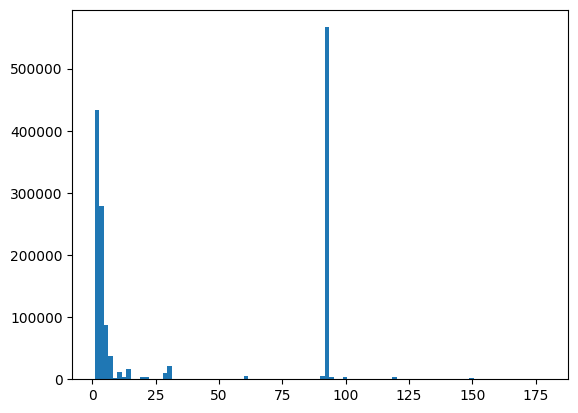

minimum_nights
92     548615
2      224119
1      209186
3      201385
4       76797
        ...  
23          3
68          2
42          1
305         1
197         1
Name: count, Length: 144, dtype: int64


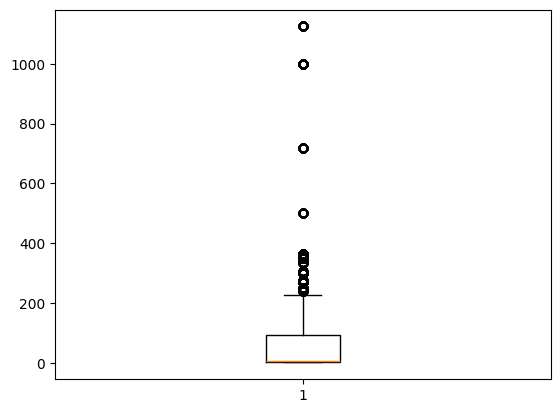

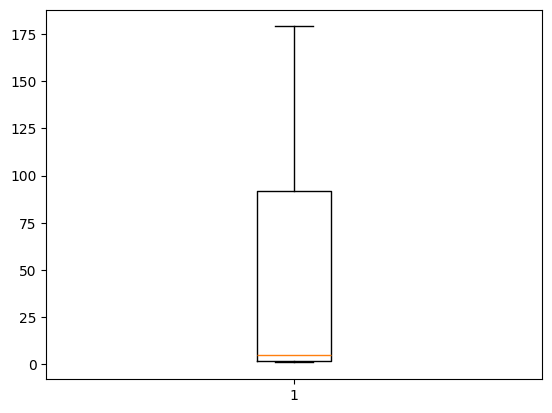

In [372]:
print(minimum_nights[minimum_nights > 200].count())
print(minimum_nights[minimum_nights > 300].count())
q99 = minimum_nights.quantile(0.99)
print(q99)
plt.hist(minimum_nights[minimum_nights < q99], bins=100)
plt.show()

print(minimum_nights.value_counts())

plt.boxplot(minimum_nights)
plt.show()

plt.boxplot(minimum_nights[minimum_nights < q99])
plt.show()

count    1.530937e+06
mean     1.083568e+06
std      4.821147e+07
min      1.000000e+00
25%      1.800000e+02
50%      7.300000e+02
75%      1.125000e+03
max      2.147484e+09
Name: maximum_nights, dtype: float64

Value counts
 maximum_nights
1125    709379
365     306224
30       45658
180      33880
14       31089
         ...  
286          1
215          1
171          1
159          1
284          1
Name: count, Length: 330, dtype: int64
772
1125.0


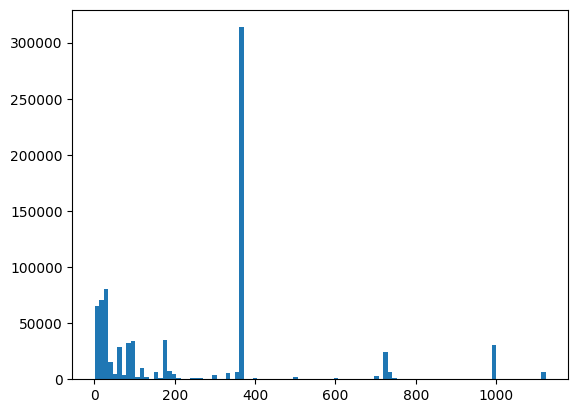

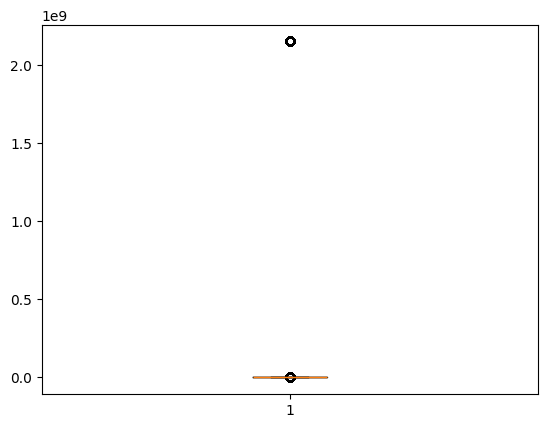

{'whiskers': [<matplotlib.lines.Line2D at 0x767d11371a90>,
 'caps': [<matplotlib.lines.Line2D at 0x767d113713d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x767d11373140>],
 'medians': [<matplotlib.lines.Line2D at 0x767d11372bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x767d11370290>],
 'means': []}

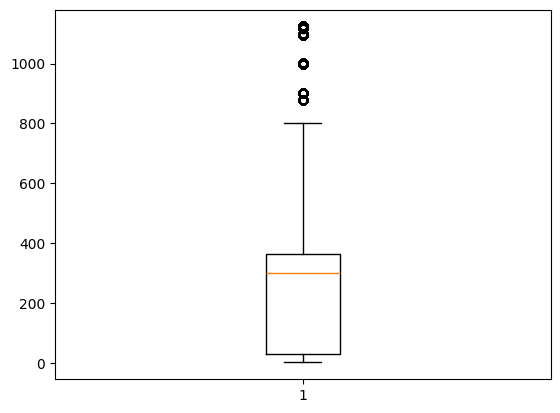

In [373]:
maximum_nights = calendar["maximum_nights"]
print(maximum_nights.describe())
print("\nValue counts\n",maximum_nights.value_counts())

print(maximum_nights[maximum_nights == maximum_nights.max()].count())

q99 = maximum_nights.quantile(0.99)
print(q99)

plt.hist(maximum_nights[maximum_nights < q99], bins=100)
plt.show()

plt.boxplot(maximum_nights)
plt.show()

plt.boxplot(maximum_nights[maximum_nights < q99])

<Axes: xlabel='date'>

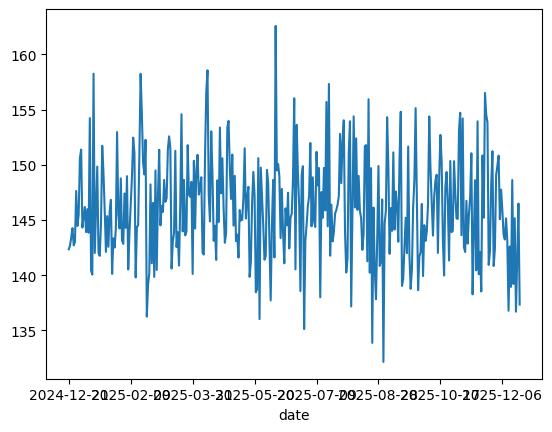

In [374]:
calendar.groupby("date")["price"].mean().plot()

## Listings

Wnioski

* Ponad 80% ocen zawiera się między 4.5 a 5.0

In [375]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1047164111839138424,https://www.nocarz.pl/rooms/1047164111839138424,20241221052002,2024-12-21,city scrape,Privatzimmer in Neukölln/Rixdorf (Erdgeschoß),"Hey dear guests, <br /><br />the room has a be...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,541377699,...,4.95,4.86,4.70,08/Z/AZ/014226-24,t,1,0,1,0,6.94
1,24793153,https://www.nocarz.pl/rooms/24793153,20241221052002,2024-12-21,previous scrape,Ganze Wohnung in Berlin Pankow,Cozy furnished and spacious 2 bedroom apartmen...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,63053103,...,4.79,4.71,4.71,First name and Last name: Jana Roskosova <br/...,f,1,1,0,0,0.67
2,9768263,https://www.nocarz.pl/rooms/9768263,20241221052002,2024-12-21,previous scrape,Loftapartment Prenzlauer Berg,"enjoy Berlin on 88 square meter in our sunny, ...",Situated in the hard of 'Prenzlauer Berg' you'...,https://a0.muscache.com/pictures/4c096212-fe21...,21256997,...,5.00,4.90,4.80,NaN,f,1,1,0,0,0.09
3,798586109549068377,https://www.nocarz.pl/rooms/798586109549068377,20241221052002,2024-12-21,city scrape,"Colorful apartment in Schillerkiez, Neukölln",Enjoy the this colorful home in “Berlin’s cool...,"Voted ""coolest neighborhood"" by Time Out Magaz...",https://a0.muscache.com/pictures/miso/Hosting-...,564509,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,28806732,https://www.nocarz.pl/rooms/28806732,20241221052002,2024-12-21,previous scrape,Neukölln Home,"Loft bed, fold out couch, kitchen and balcony ...",Plenty of neighbourhood bars and cafes to keep...,https://a0.muscache.com/pictures/60151487-cc67...,217262525,...,5.00,4.60,4.40,NaN,f,1,1,0,0,0.07


In [376]:
for c in listings.columns: print(c)

id
listing_url
scrape_id
last_scraped
source
name
description
neighborhood_overview
picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
latitude
longitude
property_type
room_type
accommodates
bathrooms
bathrooms_text
bedrooms
beds
amenities
price
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped
number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
review_scores_rating
review_scores_accuracy
re

In [377]:
def drop_useless_columns(df):

    cols_to_drop = [
        "id",
        "listing_url",
        "scrape_id",
        "last_scraped",
        "source",
        "picture_url",
        "host_name",
        "host_url",
        "host_thumbnail_url",
        "host_picture_url",
        "calendar_last_scraped",
        "neighbourhood",
        "host_location",
        "host_neighbourhood",
        "neighbourhood_cleansed",
    ]

    return df.drop(columns=cols_to_drop)

In [378]:
def drop_fulltext_columns(df):
    """Text columns that are useless but could be processed with an LLM(?)"""
    text_columns = [
        "name",
        "description",
        "neighborhood_overview",
        "host_about",
        "license",
    ]

    return df.drop(columns=text_columns)

In [379]:
listings = drop_useless_columns(listings)

In [380]:
listings.head()

,name,description,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,Privatzimmer in Neukölln/Rixdorf (Erdgeschoß),"Hey dear guests, <br /><br />the room has a be...",NaN,541377699,2023-10-11,NaN,within an hour,100%,100%,t,...,4.95,4.86,4.70,08/Z/AZ/014226-24,t,1,0,1,0,6.94
1,Ganze Wohnung in Berlin Pankow,Cozy furnished and spacious 2 bedroom apartmen...,NaN,63053103,2016-03-15,NaN,NaN,NaN,NaN,f,...,4.79,4.71,4.71,First name and Last name: Jana Roskosova <br/...,f,1,1,0,0,0.67
2,Loftapartment Prenzlauer Berg,"enjoy Berlin on 88 square meter in our sunny, ...",Situated in the hard of 'Prenzlauer Berg' you'...,21256997,2014-09-12,NaN,NaN,NaN,NaN,f,...,5.00,4.90,4.80,NaN,f,1,1,0,0,0.09
3,"Colorful apartment in Schillerkiez, Neukölln",Enjoy the this colorful home in “Berlin’s cool...,"Voted ""coolest neighborhood"" by Time Out Magaz...",564509,2011-05-07,Passion for music and playing the piano.,NaN,NaN,0%,f,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,Neukölln Home,"Loft bed, fold out couch, kitchen and balcony ...",Plenty of neighbourhood bars and cafes to keep...,217262525,2018-09-25,NaN,NaN,NaN,NaN,f,...,5.00,4.60,4.40,NaN,f,1,1,0,0,0.07


In [381]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4195 entries, 0 to 4194
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4195 non-null   object 
 1   description                                   4010 non-null   object 
 2   neighborhood_overview                         2054 non-null   object 
 3   host_id                                       4195 non-null   int64  
 4   host_since                                    4192 non-null   object 
 5   host_about                                    2186 non-null   object 
 6   host_response_time                            2566 non-null   object 
 7   host_response_rate                            2566 non-null   object 
 8   host_acceptance_rate                          2831 non-null   object 
 9   host_is_superhost                             4160 non-null   o

In [382]:
def transform_binary_columns(df):
    """To standard 0/1"""
    binary_columns = [
        "host_is_superhost",
        "host_has_profile_pic",
        "host_identity_verified",
        "has_availability",
        "instant_bookable"
    ]

    for c in binary_columns:
        unique_vals = df[c].unique()
        assert len(unique_vals) == 2 or len(unique_vals) == 3
        assert "t" in unique_vals and "f" in unique_vals

        df[c] = df[c].apply(lambda x: 1 if x == "t" else 0)

    return df

In [383]:
listings = transform_binary_columns(listings)

In [384]:
listings[["host_is_superhost", "host_has_profile_pic", "host_identity_verified", "has_availability", "instant_bookable"]].head(10)

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
0,1,1,1,1,1
1,0,1,1,1,0
2,0,1,1,1,0
3,0,1,1,1,0
4,0,1,1,1,0
5,0,1,1,1,0
6,0,1,1,1,1
7,1,1,1,1,0
8,0,0,1,1,0
9,0,1,1,1,0


In [385]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4195 entries, 0 to 4194
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4195 non-null   object 
 1   description                                   4010 non-null   object 
 2   neighborhood_overview                         2054 non-null   object 
 3   host_id                                       4195 non-null   int64  
 4   host_since                                    4192 non-null   object 
 5   host_about                                    2186 non-null   object 
 6   host_response_time                            2566 non-null   object 
 7   host_response_rate                            2566 non-null   object 
 8   host_acceptance_rate                          2831 non-null   object 
 9   host_is_superhost                             4195 non-null   i

In [386]:
def aggregate_rating_columns(df):
    """Replace all review scores columns with a single average rating column"""
    rating_columns = [
        "review_scores_rating",
        "review_scores_accuracy",
        "review_scores_cleanliness",
        "review_scores_checkin",
        "review_scores_communication",
        "review_scores_location",
        "review_scores_value",
    ]
    df["avg_rating"] = df[rating_columns].mean(axis=1)
    df = df.drop(columns=rating_columns)
    return df

In [387]:
listings = aggregate_rating_columns(listings)
listings["avg_rating"].describe()

count    3223.000000
mean        4.768786
std         0.274342
min         0.714286
25%         4.705714
50%         4.838571
75%         4.920000
max         5.000000
Name: avg_rating, dtype: float64

In [388]:
print(listings["avg_rating"].isna().sum())
print(len(listings))

972
4195


In [389]:
print("Q01", listings["avg_rating"].quantile(0.01))
print("Q10", listings["avg_rating"].quantile(0.10))
print("Q25", listings["avg_rating"].quantile(0.25))
print("Q75", listings["avg_rating"].quantile(0.75))
print("Q90", listings["avg_rating"].quantile(0.90))
print("Q99", listings["avg_rating"].quantile(0.99))

Q01 3.703142857142857
Q10 4.531714285714286
Q25 4.705714285714286
Q75 4.92
Q90 4.975714285714285
Q99 5.0


In [390]:
listings = pd.read_csv('../data/listings.csv')
price = listings["price"]
print(len(price))
price.map(lambda p: str(type(p))).value_counts()

4195


price
<class 'str'>      2674
<class 'float'>    1521
Name: count, dtype: int64

In [391]:
def transform_price(df):
    """Transform price column to float"""
    transform_string_price = lambda p: float(p.replace("$", "").replace(",", ""))


    df["price"] = df["price"].apply(lambda p: transform_string_price(p) if isinstance(p, str) else p)
    return df

### List columns


In [392]:
list_columns = [
    "host_verifications",
    "amenities",
]
#TODO

### Categorical columns

In [393]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1047164111839138424,https://www.nocarz.pl/rooms/1047164111839138424,20241221052002,2024-12-21,city scrape,Privatzimmer in Neukölln/Rixdorf (Erdgeschoß),"Hey dear guests, <br /><br />the room has a be...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,541377699,...,4.95,4.86,4.70,08/Z/AZ/014226-24,t,1,0,1,0,6.94
1,24793153,https://www.nocarz.pl/rooms/24793153,20241221052002,2024-12-21,previous scrape,Ganze Wohnung in Berlin Pankow,Cozy furnished and spacious 2 bedroom apartmen...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,63053103,...,4.79,4.71,4.71,First name and Last name: Jana Roskosova <br/...,f,1,1,0,0,0.67
2,9768263,https://www.nocarz.pl/rooms/9768263,20241221052002,2024-12-21,previous scrape,Loftapartment Prenzlauer Berg,"enjoy Berlin on 88 square meter in our sunny, ...",Situated in the hard of 'Prenzlauer Berg' you'...,https://a0.muscache.com/pictures/4c096212-fe21...,21256997,...,5.00,4.90,4.80,NaN,f,1,1,0,0,0.09
3,798586109549068377,https://www.nocarz.pl/rooms/798586109549068377,20241221052002,2024-12-21,city scrape,"Colorful apartment in Schillerkiez, Neukölln",Enjoy the this colorful home in “Berlin’s cool...,"Voted ""coolest neighborhood"" by Time Out Magaz...",https://a0.muscache.com/pictures/miso/Hosting-...,564509,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,28806732,https://www.nocarz.pl/rooms/28806732,20241221052002,2024-12-21,previous scrape,Neukölln Home,"Loft bed, fold out couch, kitchen and balcony ...",Plenty of neighbourhood bars and cafes to keep...,https://a0.muscache.com/pictures/60151487-cc67...,217262525,...,5.00,4.60,4.40,NaN,f,1,1,0,0,0.07


In [394]:
# candidates ?
categorical_columns = [
    # "host_location",
    # "host_response_time",
    # "host_neighbourhood",
    # "neighbourhood",
    # "neighbourhood_cleansed",
    "neighbourhood_group_cleansed",
    "property_type",
    "room_type",
    # "bathrooms_text"
]

In [395]:
listings["host_location"].value_counts()

host_location
Berlin, Germany                     2997
Germany                               41
Munich, Germany                       23
Hamburg, Germany                      15
Cologne, Germany                      14
                                    ... 
Elmenhorst/Lichtenhagen, Germany       1
Schwelm, Germany                       1
Ratingen, Germany                      1
Lisbon, Portugal                       1
Slovenia                               1
Name: count, Length: 198, dtype: int64

In [396]:
def extract_host_country(df):
    """Extract host country from host_location"""

    def extract_country_from_location(location: str):
        if not "," in location:
            return location

        state = location.split(",")[-1].strip()

        if len(state) == 2:
            return "United States"

        return state

    df["host_country"] = df["host_location"].apply(lambda x: extract_country_from_location(x) if isinstance(x, str) else x)
    return df

In [397]:
# Prawie tylko Niemcy, chyba nie warto
listings = extract_host_country(listings)
listings["host_country"].value_counts()

host_country
Germany             3203
United States         28
Italy                 21
United Kingdom        18
Spain                 18
Switzerland           15
France                14
Austria                8
Israel                 8
Australia              7
Denmark                5
Belgium                4
Sweden                 4
Indonesia              3
Ireland                3
Canada                 3
South Korea            3
Singapore              3
Turkey                 3
Russia                 3
Mexico                 2
India                  2
Taiwan                 2
Slovenia               2
Chile                  2
Kenya                  2
South Africa           2
Thailand               1
Norway                 1
Morocco                1
Puerto Rico            1
Greece                 1
Namibia                1
Egypt                  1
Poland                 1
Colombia               1
Brazil                 1
Bulgaria               1
Hong Kong              1
French Polyn

In [398]:
print(listings["host_response_time"].value_counts())
print(listings["host_response_time"].unique())

host_response_time
within an hour        1589
within a few hours     524
within a day           339
a few days or more     114
Name: count, dtype: int64
['within an hour' nan 'within a day' 'within a few hours'
 'a few days or more']


In [399]:
def transform_host_response_time(df):
    """Transform host response time to a number"""
    #TODO adjust scale
    scale = {
        "within an hour": 1,
        "within a few hours": 2,
        "within a day": 3,
        "a few days or more": 4,
    }

    df["host_response_time"] = df["host_response_time"].apply(lambda x: scale.get(x, np.nan))
    return df

In [400]:
listings = pd.read_csv('../data/listings.csv')
listings = transform_host_response_time(listings)
print(listings["host_response_time"].value_counts())
print(listings["host_response_time"].isna().sum())

host_response_time
1.0    1589
2.0     524
3.0     339
4.0     114
Name: count, dtype: int64
1629


In [401]:
print(len(listings["host_neighbourhood"].unique()))  # Too many categories
print(len(listings["neighbourhood_cleansed"].unique())) # Too many categories
print(len(listings["neighbourhood"].unique()))
print(len(listings["neighbourhood_group_cleansed"].unique()))

104
133
13
12


In [402]:
listings["neighbourhood"].value_counts() # Useless

neighbourhood
Berlin, Germany                             2043
Berlin Charlottenburg, Berlin, Germany         1
Berlin-Kreuzberg, Berlin, Germany              1
Berlin, Zehlendorf, Germany                    1
Berlin, Be, Germany                            1
Berlin, Mitte, Germany                         1
Weissenhoher Strasse 14, Berlin, Germany       1
Weissensee, Berlin, Germany                    1
Berlin - Mitte, Germany                        1
Berlin, Kreuzberg, Berlin, Germany             1
Alt Treptow, Berlin, Germany                   1
Köpenick, Berlin, Germany                      1
Name: count, dtype: int64

In [403]:
listings["neighbourhood_group_cleansed"].value_counts() # Maybe useful

neighbourhood_group_cleansed
Friedrichshain-Kreuzberg    951
Mitte                       879
Pankow                      632
Neukölln                    475
Charlottenburg-Wilm.        424
Tempelhof - Schöneberg      306
Treptow - Köpenick          179
Steglitz - Zehlendorf       114
Lichtenberg                 100
Reinickendorf                61
Spandau                      44
Marzahn - Hellersdorf        30
Name: count, dtype: int64

In [404]:
listings["property_type"].value_counts()

property_type
Entire rental unit                    2295
Private room in rental unit            941
Entire condo                           233
Room in hotel                          114
Entire serviced apartment              105
Private room in condo                   92
Entire loft                             72
Private room in home                    60
Entire home                             52
Private room in loft                    20
Private room in bed and breakfast       20
Room in boutique hotel                  18
Private room in hostel                  17
Entire guesthouse                       17
Room in serviced apartment              16
Entire townhouse                        13
Private room in serviced apartment      13
Houseboat                               11
Entire vacation home                     9
Entire guest suite                       8
Private room                             8
Private room in guesthouse               7
Room in aparthotel                      

In [405]:
def group_property_types(df):
    """Group together similar property types"""

    def transform(property_type: str):
        if "entire rental unit" in property_type.lower():
            return "entire rental unit"
        elif "room" in property_type.lower():
            return "room"
        elif "apartment" in property_type.lower():
            return "apartment"
        elif "home" in property_type.lower():
            return "home"
        elif "condo" in property_type.lower():
            return "condo"
        else:
            return "other"

    df["property_type"] = df["property_type"].apply(lambda x: transform(x) if isinstance(x, str) else x)
    return df

In [406]:
listings = pd.read_csv('../data/listings.csv')
listings = group_property_types(listings)
listings["property_type"].value_counts()

property_type
entire rental unit    2295
room                  1359
condo                  233
other                  139
apartment              105
home                    64
Name: count, dtype: int64

In [407]:
listings["room_type"].value_counts()

room_type
Entire home/apt    2842
Private room       1298
Hotel room           44
Shared room          11
Name: count, dtype: int64

In [408]:
listings["bathrooms_text"].value_counts()

bathrooms_text
1 bath               2563
1 shared bath         595
2 baths               298
1 private bath        280
1.5 baths             229
1.5 shared baths       57
2 shared baths         41
2.5 baths              30
3 baths                22
Half-bath              20
0 baths                17
0 shared baths          7
Shared half-bath        7
Private half-bath       6
3.5 baths               4
4 shared baths          3
4 baths                 3
2.5 shared baths        3
3 shared baths          3
8.5 shared baths        1
8.5 baths               1
27 baths                1
6 baths                 1
Name: count, dtype: int64

In [409]:
def extract_is_shared_from_bathrooms_text(df):
    """Extract is_shared from bathrooms_text column"""
    extract_is_shared = lambda txt: 1 if "shared" in txt.lower() else 0
    df["is_shared_bathroom"] = df["bathrooms_text"].apply(lambda x: extract_is_shared(x) if isinstance(x, str) else x)
    df = df.drop(columns=["bathrooms_text"])
    return df

In [410]:
def categorical_columns_one_hot_encoding(df):
    """One-hot encode categorical columns"""
    categorical_columns = [
        "neighbourhood_group_cleansed",
        "property_type",
        "room_type",
        "is_shared_bathroom",
    ]

    df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    return df

## Final transformations

In [411]:
def transform_listings(df):
    df = drop_useless_columns(df)
    df = drop_fulltext_columns(df)
    df = transform_binary_columns(df)
    df = aggregate_rating_columns(df)
    df = transform_price(df)
    df = transform_host_response_time(df)
    df = extract_is_shared_from_bathrooms_text(df)
    df = group_property_types(df)
    df = categorical_columns_one_hot_encoding(df) # after extracting is_shared_bathroom and grouping property types!
    return df

In [412]:
listings = pd.read_csv('../data/listings.csv')
listings = transform_listings(listings)

In [413]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4195 entries, 0 to 4194
Data columns (total 65 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   host_id                                                4195 non-null   int64  
 1   host_since                                             4192 non-null   object 
 2   host_response_time                                     2566 non-null   float64
 3   host_response_rate                                     2566 non-null   object 
 4   host_acceptance_rate                                   2831 non-null   object 
 5   host_is_superhost                                      4195 non-null   int64  
 6   host_listings_count                                    4192 non-null   float64
 7   host_total_listings_count                              4192 non-null   float64
 8   host_verifications                              

In [414]:
# TODO
# list columns (above)
# host_since
# host_response_rate
# host_acceptance_rate
# first_review
# last_review
# verify if int columns make sense